# K-Nearest Neighbors (K-NN) Classification
## Prepared by: Rob Eugene A. Dequiñon and John Kenneth P. Alon


In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay


# Loading of Data + Presentation
df = pd.read_csv("mapua_scholarship_data.csv")
print(df.head())
print(df.describe())
print(df.info())


        GPA  Family_Income_K_PHP  Extracurricular_Activities  \
0  2.498160          1086.255392                           2   
1  4.802857          1010.445567                           8   
2  3.927976           148.719925                           4   
3  3.394634           748.370872                           7   
4  1.624075           822.371676                           6   

   Admission_Exam_Score  Scholarship_Grant  
0             74.298444                  1  
1             91.441565                  1  
2             78.800603                  1  
3             85.764109                  0  
4             90.934984                  1  
               GPA  Family_Income_K_PHP  Extracurricular_Activities  \
count  1500.000000          1500.000000                 1500.000000   
mean      2.997428          1050.815696                    5.091333   
std       1.176060           549.813751                    3.184402   
min       1.018528           100.022106                    0.

In [5]:
# Data Preprocessing

X = df.drop("Scholarship_Grant", axis=1)
y = df["Scholarship_Grant"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# KNN Model Training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


Accuracy: 0.6666666666666666
Precision: 0.7389380530973452
Recall: 0.8028846153846154

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.36      0.40        92
           1       0.74      0.80      0.77       208

    accuracy                           0.67       300
   macro avg       0.59      0.58      0.58       300
weighted avg       0.65      0.67      0.66       300



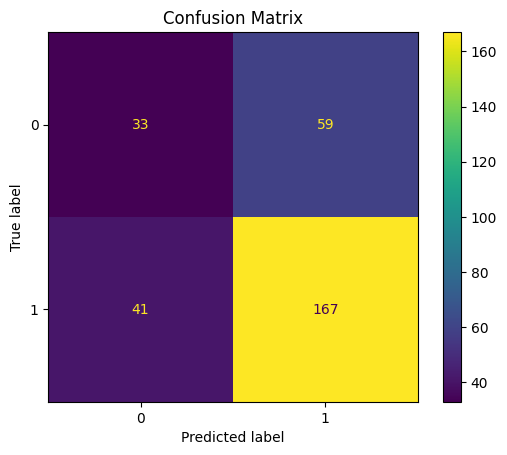

In [7]:
# Model Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()


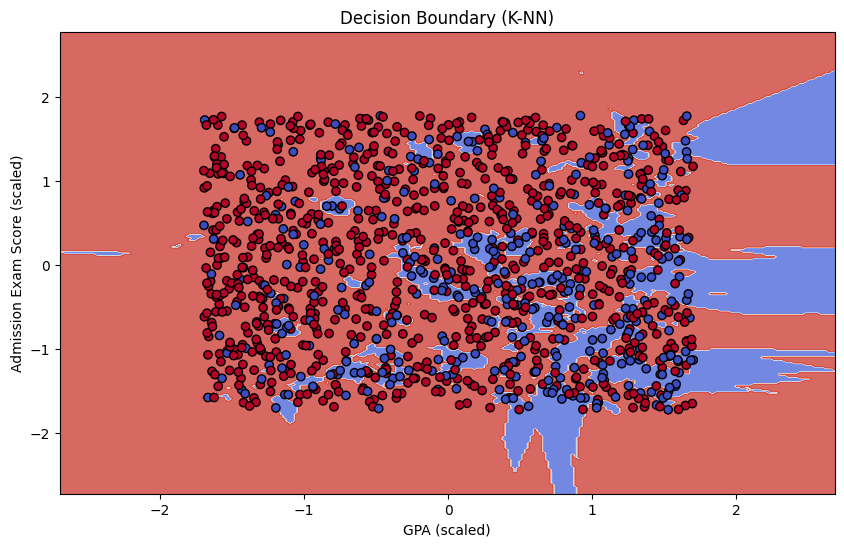

In [8]:
# Data Visualization

# Using 2 features: GPA and Admission_Exam_Score
X_2 = df[["GPA", "Admission_Exam_Score"]]
y_2 = df["Scholarship_Grant"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

scaler_2 = StandardScaler()
X2_train_scaled = scaler_2.fit_transform(X2_train)
X2_test_scaled = scaler_2.transform(X2_test)

knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X2_train_scaled, y2_train)

# Create meshgrid
h = .02  # step size in mesh
x_min, x_max = X2_train_scaled[:, 0].min() - 1, X2_train_scaled[:, 0].max() + 1
y_min, y_max = X2_train_scaled[:, 1].min() - 1, X2_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X2_train_scaled[:, 0], X2_train_scaled[:, 1], c=y2_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("GPA (scaled)")
plt.ylabel("Admission Exam Score (scaled)")
plt.title("Decision Boundary (K-NN)")
plt.show()
